In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [88]:
df = pd.read_csv('data.csv')
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [89]:
df.shape

(10000, 14)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [91]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tau1,10000.0,5.250000,2.742548,0.500793,2.874892,5.250004,7.624690,9.999469
tau2,10000.0,5.250001,2.742549,0.500141,2.875140,5.249981,7.624893,9.999837
tau3,10000.0,5.250004,2.742549,0.500788,2.875522,5.249979,7.624948,9.999450
tau4,10000.0,5.249997,2.742556,0.500473,2.874950,5.249734,7.624838,9.999443
p1,10000.0,3.750000,0.752160,1.582590,3.218300,3.751025,4.282420,5.864418
p2,10000.0,-1.250000,0.433035,-1.999891,-1.624901,-1.249966,-0.874977,-0.500108
p3,10000.0,-1.250000,0.433035,-1.999945,-1.625025,-1.249974,-0.875043,-0.500072
p4,10000.0,-1.250000,0.433035,-1.999926,-1.624960,-1.250007,-0.875065,-0.500025
g1,10000.0,0.525000,0.274256,0.050009,0.287521,0.525009,0.762435,0.999937
g2,10000.0,0.525000,0.274255,0.050053,0.287552,0.525003,0.762490,0.999944


In [92]:
corr = df.corr()

<AxesSubplot:>

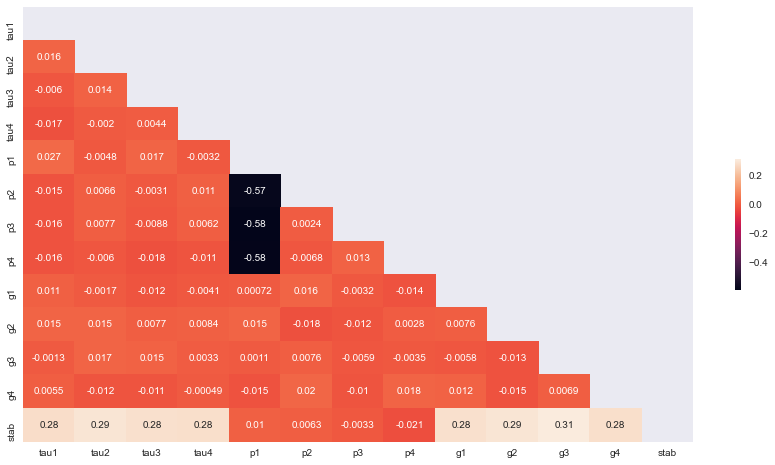

In [93]:
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(corr, annot=True, mask = np.triu(np.ones_like(corr)), cbar_kws={'shrink':0.3})

In [94]:
df.drop('stab', axis=1, inplace=True)

In [95]:
df.head(2)

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable


In [96]:
df['stabf'].value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

In [97]:
from sklearn.preprocessing import LabelEncoder

In [98]:
encoder = LabelEncoder()
df['stabf'] = encoder.fit_transform(df['stabf'])

In [99]:
encoder.classes_

array(['stable', 'unstable'], dtype=object)

In [100]:
df['stabf'].value_counts()

1    6380
0    3620
Name: stabf, dtype: int64

In [101]:
x = df.drop('stabf', axis=1)
y = df['stabf']

In [102]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [103]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [104]:
scaler = StandardScaler()

scaled_df = scaler.fit_transform(x_train, y_train)
x_train = pd.DataFrame(scaled_df, columns=x.columns)

x_test = scaler.transform(x_test)
x_test = pd.DataFrame(x_test, columns=x.columns)

In [105]:
print('x_train: ', x_train.shape, '\nx_test: ', x_test.shape, '\ny_train: ', y_train.shape, '\ny_test: ', y_test.shape)

x_train:  (8000, 12) 
x_test:  (2000, 12) 
y_train:  (8000,) 
y_test:  (2000,)


### Random Forest Classifier

In [106]:
from sklearn.ensemble import RandomForestClassifier

In [107]:
rfc = RandomForestClassifier(random_state=1, verbose=0)

In [108]:
rfc_model = rfc.fit(x_train, y_train)

In [109]:
y_pred_rfc = rfc_model.predict(x_test)

In [110]:
y_pred_rfc[0:5]

array([1, 1, 0, 0, 1])

In [116]:
metrics.confusion_matrix(y_test, y_pred_rfc)

array([[ 625,   87],
       [  55, 1233]], dtype=int64)

In [154]:
rfc_summary = pd.DataFrame(metrics.classification_report(y_test, y_pred_rfc, output_dict=True)).T

In [155]:
rfc_summary

,precision,recall,f1-score,support
0,0.919118,0.877809,0.897989,712.000
1,0.934091,0.957298,0.945552,1288.000
accuracy,0.929000,0.929000,0.929000,0.929
macro avg,0.926604,0.917554,0.921770,2000.000
weighted avg,0.928760,0.929000,0.928619,2000.000


In [117]:
probs = rfc_model.predict_proba(x_test)

In [118]:
probs = probs[:, 1]

In [119]:
random_probs = [0 for i in range(len(y_test))]

In [120]:
p_fpr, p_tpr, _ = metrics.roc_curve(y_test, random_probs, pos_label=1)

In [121]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, probs, pos_label=1)

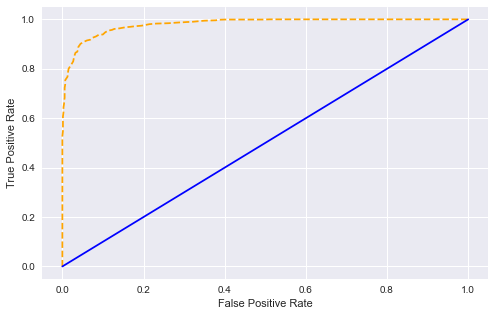

In [122]:
plt.style.use('seaborn')
fig = plt.figure(figsize=(8,5))
plt.plot(fpr, tpr, linestyle='--', color='orange')
plt.plot(p_fpr, p_tpr, linestyle='-', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

### Extra Tree Classifier No Tuning

In [173]:
from sklearn.ensemble import ExtraTreesClassifier

In [174]:
extra_no_tune = ExtraTreesClassifier(random_state=1)

In [175]:
no_tuned_model = extra_no_tune.fit(x_train, y_train)

In [176]:
y_pred_extra_no_tune = no_tuned_model.predict(x_test)

In [177]:
extra_no_tune_summary = pd.DataFrame(metrics.classification_report(y_test, y_pred_extra_no_tune, output_dict=True)).T

In [178]:
extra_no_tune_summary

,precision,recall,f1-score,support
0,0.940994,0.851124,0.893805,712.000
1,0.921829,0.970497,0.945537,1288.000
accuracy,0.928000,0.928000,0.928000,0.928
macro avg,0.931411,0.910810,0.919671,2000.000
weighted avg,0.928652,0.928000,0.927121,2000.000


### Extra Tree Classifier with Tuning

In [192]:
n_estimators = [50, 100, 300, 500, 1000]
min_samples_split = [2, 3, 5, 7, 9]
min_samples_leaf = [1, 2, 4, 6, 8]
max_features = ['auto', 'sqrt', 'log2', None] 
hyperparameter_grid = {'n_estimators': n_estimators,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

In [193]:
est = ExtraTreesClassifier(random_state=1)

In [194]:
rcv = RandomizedSearchCV(est, hyperparameter_grid, cv=5, n_jobs=-1, verbose=2, random_state=1)

In [195]:
extra_model = rcv.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  3.6min finished


In [196]:
y_pred_extra = extra_model.predict(x_test)

In [200]:
metrics.confusion_matrix(y_test, y_pred_extra)

array([[ 619,   93],
       [  53, 1235]], dtype=int64)

In [201]:
extra_summary = pd.DataFrame(metrics.classification_report(y_test, y_pred_extra, output_dict=True)).T

In [202]:
extra_summary

,precision,recall,f1-score,support
0,0.921131,0.869382,0.894509,712.000
1,0.929970,0.958851,0.944190,1288.000
accuracy,0.927000,0.927000,0.927000,0.927
macro avg,0.925550,0.914116,0.919349,2000.000
weighted avg,0.926823,0.927000,0.926503,2000.000


### XGBoost Classifier

In [136]:
xgb = XGBClassifier(verbosity=0, random_state=1)

In [137]:
xgb_model = xgb.fit(x_train, y_train)

In [138]:
y_pred_xgb = xgb_model.predict(x_test)

In [142]:
metrics.confusion_matrix(y_test, y_pred_xgb)

array([[ 648,   64],
       [  45, 1243]], dtype=int64)

In [158]:
xgboost_summary = pd.DataFrame(metrics.classification_report(y_test, y_pred_xgb, output_dict=True)).T

In [159]:
xgboost_summary

,precision,recall,f1-score,support
0,0.935065,0.910112,0.922420,712.0000
1,0.951033,0.965062,0.957996,1288.0000
accuracy,0.945500,0.945500,0.945500,0.9455
macro avg,0.943049,0.937587,0.940208,2000.0000
weighted avg,0.945348,0.945500,0.945331,2000.0000


### LightGBM Classifier

In [144]:
lgbm = LGBMClassifier(random_state=1)

In [145]:
lgbm_model = lgbm.fit(x_train, y_train)

In [146]:
y_pred_lgbm = lgbm_model.predict(x_test)

In [150]:
metrics.confusion_matrix(y_test, y_pred_lgbm)

array([[ 635,   77],
       [  48, 1240]], dtype=int64)

In [170]:
lgbm_summary = pd.DataFrame(metrics.classification_report(y_test, y_pred_lgbm, output_dict=True)).T

In [171]:
lgbm_summary

,precision,recall,f1-score,support
0,0.929722,0.891854,0.910394,712.0000
1,0.941534,0.962733,0.952015,1288.0000
accuracy,0.937500,0.937500,0.937500,0.9375
macro avg,0.935628,0.927293,0.931205,2000.0000
weighted avg,0.937329,0.937500,0.937198,2000.0000
